In [112]:
def selection(k, arr):
    if len(arr) == 1:
        return arr[0]
    j = arr[0]
    left = [num for num in arr if num < j]
    right = [num for num in arr if num > j]
    if len(left) == k-1:
        return j
    elif len(left) >= k:
        return selection(k, left)
    else:
        return selection(k-len(left)-1, right)

In [113]:
def selection_sort(list_to_sort):
    for i in range(len(list_to_sort)):
        min_index = i
        for j in range(i + 1, len(list_to_sort)):
            if (list_to_sort[j] < list_to_sort[min_index]):
                min_index = j
        temp_value = list_to_sort[i]
        list_to_sort[i] = list_to_sort[min_index]
        list_to_sort[min_index] = temp_value
    return list_to_sort

In [114]:
def selection_by_sort(k, arr):
    arr = selection_sort(arr)
    return arr[k-1]

In [115]:
test_cases = [
    [3,[1,2,3,4,5]], #ascending order
    [3,[5,4,3,2,1]], #descending order
    [1,[4]], #1 element
    [5,[1,9,2,8,3,7,4,6,5]], #random order
    [3,[5,1,6,7,3,4,8]], #example set
   # [4,[1,2,3,3,3,4,5]], #duplicates - Might not need to do
    [6,[-1,1,-2,2,-3,3,-4,4,-5,5]], #negatives
    [5,[1,4,5,3,2]], # k = n
    [1,[2,5,4,3,1]], # k = 1
    [1,[1,1,1,1,1,1,1]] #all elements equal
]

solutions = [
    3, #ascending order
    3, #descending order
    4, #1 element
    5, #random order
    4, #example set
  #  3, #duplicates - Might not need to do
    1, #negatives
    5, #k = n
    1, #k = 1
    1 #all elements equal
]

print("Our algorithm vs test cases")
for i in range(0, len(test_cases)):
    print("Test Case: k = " + str(test_cases[i][0]) + " Array = "+ str(test_cases[i][1]) + " | Solution: " + str(solutions[i]) + " | Algorithm's Solution: " + str(selection(test_cases[i][0], test_cases[i][1])))

print()
print("Selection via sort vs test cases")
for i in range(0, len(test_cases)):
    print("Test Case: k = " + str(test_cases[i][0]) + " Array = "+ str(test_cases[i][1]) + " | Solution: " + str(solutions[i]) + " | Algorithm's Solution: " + str(selection_by_sort(test_cases[i][0], test_cases[i][1])))


Our algorithm vs test cases
Test Case: k = 3 Array = [1, 2, 3, 4, 5] | Solution: 3 | Algorithm's Solution: 3
Test Case: k = 3 Array = [5, 4, 3, 2, 1] | Solution: 3 | Algorithm's Solution: 3
Test Case: k = 1 Array = [4] | Solution: 4 | Algorithm's Solution: 4
Test Case: k = 5 Array = [1, 9, 2, 8, 3, 7, 4, 6, 5] | Solution: 5 | Algorithm's Solution: 5
Test Case: k = 3 Array = [5, 1, 6, 7, 3, 4, 8] | Solution: 4 | Algorithm's Solution: 4
Test Case: k = 6 Array = [-1, 1, -2, 2, -3, 3, -4, 4, -5, 5] | Solution: 1 | Algorithm's Solution: 1
Test Case: k = 5 Array = [1, 4, 5, 3, 2] | Solution: 5 | Algorithm's Solution: 5
Test Case: k = 1 Array = [2, 5, 4, 3, 1] | Solution: 1 | Algorithm's Solution: 1
Test Case: k = 1 Array = [1, 1, 1, 1, 1, 1, 1] | Solution: 1 | Algorithm's Solution: 1

Selection via sort vs test cases
Test Case: k = 3 Array = [1, 2, 3, 4, 5] | Solution: 3 | Algorithm's Solution: 3
Test Case: k = 3 Array = [5, 4, 3, 2, 1] | Solution: 3 | Algorithm's Solution: 3
Test Case: k = 

In [116]:
import time
import matplotlib.pyplot as plt
import sys
import math
sys.setrecursionlimit(100000)
max = 25000

nums = []
for i in range(1,25000):
    if(i % 1000 ==0):
        nums.append(i)

selection_times_ascending = []
selSort_times_ascending = []
for i in nums:
    arr = []
    for j in range(i):
        arr.append(j)
    k = int(len(arr)/2) + 1
    #time our algorithm
    start_time = time.perf_counter()
    selection(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selection_times_ascending.append(runtime)

    #time selection by sorting
    start_time = time.perf_counter()
    selection_by_sort(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selSort_times_ascending.append(runtime)

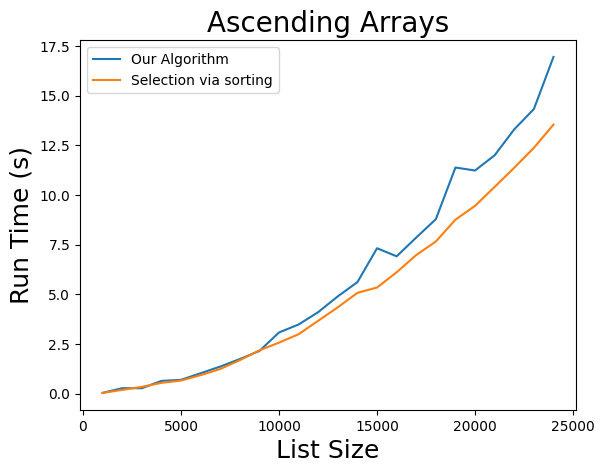

In [117]:
plt.plot(nums, selection_times_ascending, label = "Our Algorithm")
plt.plot(nums, selSort_times_ascending, label = "Selection via sorting")
plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run Time (s)", fontsize = 18)
plt.title("Ascending Arrays", fontsize = 20)
plt.legend()

In [118]:
selection_times_descending = []
selSort_times_descending = []

for i in nums:
    arr = []
    for j in range(i):
        arr.append(i-j)
    k = int(len(arr)/2) + 1
    #time our algorithm
    start_time = time.perf_counter()
    selection(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selection_times_descending.append(runtime)

    #time selection by sorting
    start_time = time.perf_counter()
    selection_by_sort(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selSort_times_descending.append(runtime)


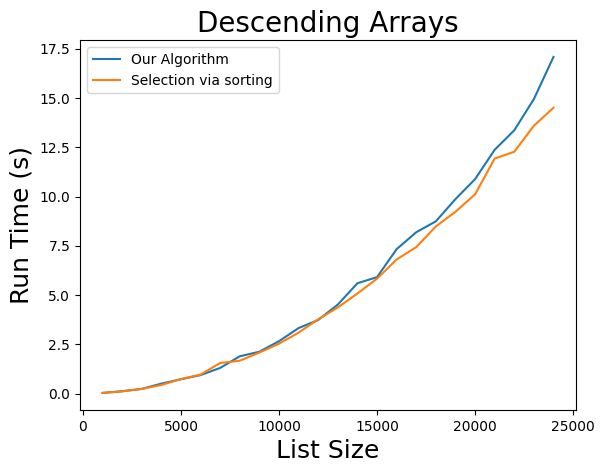

In [119]:
plt.plot(nums, selection_times_descending, label = "Our Algorithm")
plt.plot(nums, selSort_times_descending, label = "Selection via sorting")
plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run Time (s)", fontsize = 18)
plt.title("Descending Arrays", fontsize = 20)
plt.legend()

In [120]:
import random

#generate random lists
lists = []
for i in nums:
    arr = []
    nums2 = []
    for k in range(1,i+1):
        nums2.append(k)
    for j in range(i):
        index = random.randint(0,i-j-1)
        num = nums2[index]
        arr.append(num)
        nums2.pop(index)
    lists.append(arr)
    

In [123]:
selection_times_random = []
selSort_times_random = []
for arr in lists:
    k = int(len(arr)/2) + 1

    #time our algorithm
    start_time = time.perf_counter()
    selection(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selection_times_random.append(runtime)

    #time selection by sorting
    start_time = time.perf_counter()
    selection_by_sort(k,arr)
    end_time = time.perf_counter()
    runtime = end_time - start_time
    selSort_times_random.append(runtime)

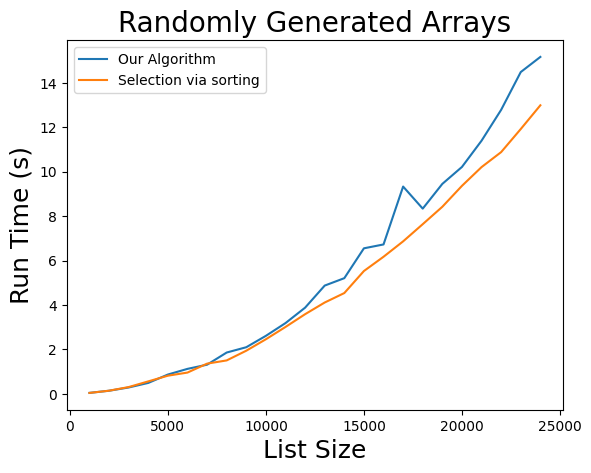

In [124]:
plt.plot(nums, selection_times_random, label = "Our Algorithm")
plt.plot(nums, selSort_times_random, label = "Selection via sorting")
plt.xlabel("List Size", fontsize = 18)
plt.ylabel("Run Time (s)", fontsize = 18)
plt.title("Randomly Generated Arrays", fontsize = 20)
plt.legend()